<a href="https://colab.research.google.com/github/drameyjoshi/statistics/blob/master/all-of-stats/Univariate_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scstat
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

# Bernoulli

A Bernoulli random variable takes one of two values, usually called $0$ and $1$, with a probability $p$. We generate an outcome of $N$ Bernoulli trials using the `np.randon.Binomial` function.

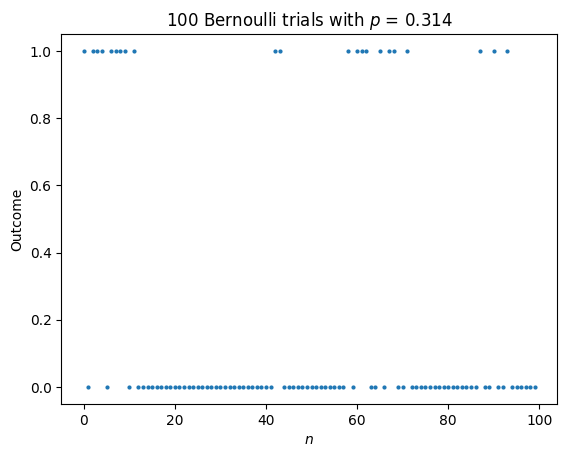

In [3]:
n_sims = 100 # Number of trials.
p = np.round(np.pi/10, 3) # Probability of success.
X_Ber = rng.binomial(size=n_sims, n=1, p=p)
_ = plt.scatter([n for n in range(0, n_sims)], X_Ber, s = 4)
_ = plt.xlabel(r'$n$')
_ = plt.ylabel('Outcome')
_ = plt.title('{0} Bernoulli trials with $p$ = {1}'.format(n_sims, p))

With a rather low probability of success, the number of times the trials succeeded is rather modest. It will not be surprising to find it not exactly $p$.

#Binomial
A binomial random variable counts the number of successes in $n$ Bernoulli trials when the probability of success is $p$.

In [5]:
n_trials = 1000
n_success = rng.binomial(size=n_sims, n=n_trials, p=p)

In [6]:
bin_sigma = np.sqrt(n_trials * p * (1 - p))
bin_mu = n_trials * p
lower_lim = bin_mu - np.round(3 * bin_sigma)
upper_lim = bin_mu + np.round(3 * bin_sigma)
estimate_at = np.linspace(start=lower_lim, stop=upper_lim, num=50)
bin_kde = scstat.gaussian_kde(n_success).evaluate(estimate_at)

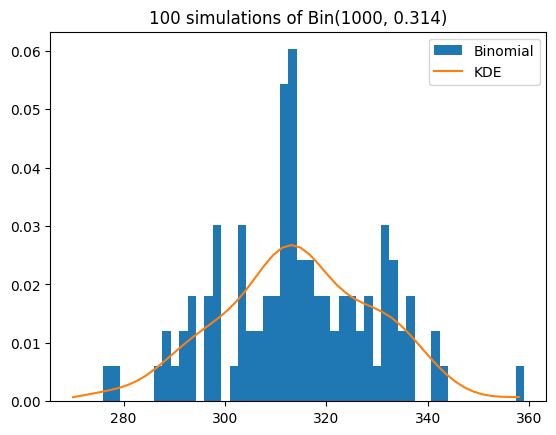

In [7]:
bin_hist = plt.hist(n_success, bins=50, density=True, label='Binomial')
plt.plot(estimate_at, bin_kde, label='KDE')
plt.legend()
_ = plt.title('{0} simulations of Bin({1}, {2})'.format(n_sims, n_trials, p))

# Geometric
A geometric random variable counts the number of times we must try before we succeed.

In [8]:
n_tries = rng.geometric(size=n_sims, p=p)
estimate_at = np.linspace(start=0, stop=np.round(n_sims*p), num=50)
geom_kde = scstat.gaussian_kde(n_tries).evaluate(estimate_at)

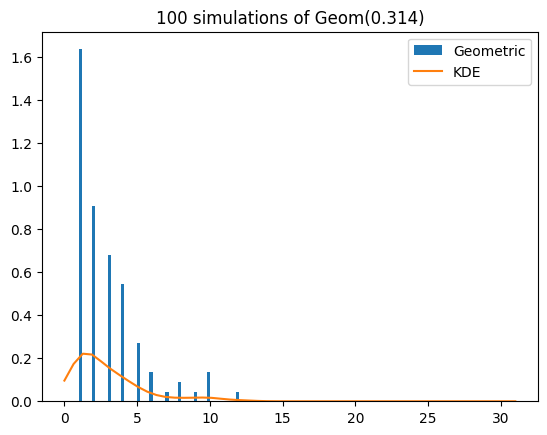

In [9]:
geom_hist = plt.hist(n_tries, bins=50, density=True, label='Geometric')
plt.plot(estimate_at, geom_kde, label='KDE')
plt.title('{0} simulations of Geom({1})'.format(n_sims, p))
plt.legend()

# Poisson

A Poisson random variable counts the number of occurrences of a rare event in a fixed interval. If the probability of success is low then we succeed only a few times in a long series of trials. Each such event is a Poisson event because it happens so rarely.

In [10]:
lam = 1.0 # This is the rate of success $\lambda$ in the Poisson PMF.
n_events = rng.poisson(lam=lam, size=n_sims)
poi_kde = scstat.gaussian_kde(n_events).evaluate(np.linspace(0, 5, 20))


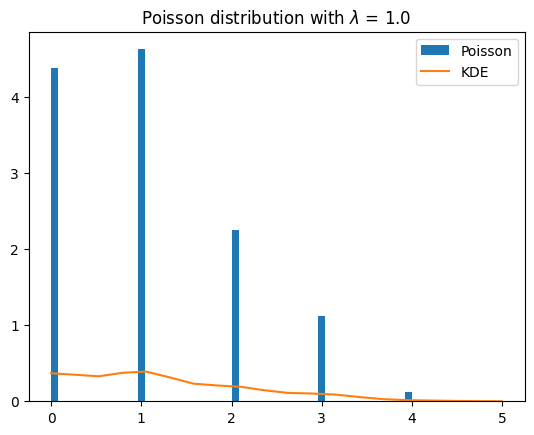

In [11]:
poi_hist = plt.hist(n_events, bins=50, density=True, label='Poisson')
plt.plot(np.linspace(0, 5, 20), poi_kde, label='KDE')
plt.title(r'Poisson distribution with $\lambda$ = {0}'.format(lam))
_ = plt.legend()

# Uniform

We will consider the continuous distribution.

In [15]:
a = 0
b = 5
samples = rng.uniform(a, b, size=n_sims)
estimate_at = np.linspace(start=a, stop=b, num=50)
unif_kde = scstat.gaussian_kde(samples).evaluate(estimate_at)

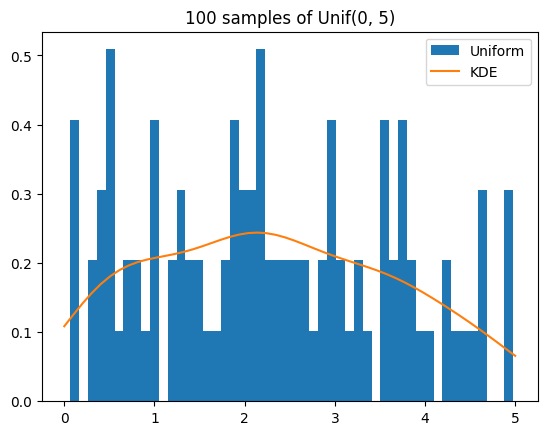

In [16]:
unif_hist = plt.hist(samples, bins=50, density=True, label='Uniform')
plt.plot(estimate_at, unif_kde, label='KDE')
plt.title('{0} samples of Unif({1}, {2})'.format(n_sims, a, b))
_ = plt.legend()

This is how a typical, randomly drawn sample looks like. Although it is draw from a uniform distribution, the sample points are not evenly distributed. To check whether this is truly a uniform distribution, we carry out a statistical test.

In [19]:
expected = np.linspace(start=a, stop=b, num=n_sims)
ks_result = scstat.ks_2samp(data1=samples, data2=expected, alternative='two-sided')
h0 = 'Sample points are uniformly distributed.'
print(ks_result)
if ks_result.pvalue < 0.05:
    print('Reject: {0}'.format(h0))
else:
    print('Fail to reject: {0}'.format(h0))

KstestResult(statistic=0.1, pvalue=0.7020569828664881, statistic_location=3.0289036536775034, statistic_sign=1)
Fail to reject: Sample points are uniformly distributed.


# Normal

# Exponential

# Gamma

# Beta

# Student's t

# Cauchy

# $\chi^2$